In [15]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import os

In [16]:
fname_co2_xz = 'co2.xz.nc'
fname_co2_xy = 'co2.xy.nc'

ds_co2_xz = nc.Dataset(fname_co2_xz)
ds_co2_xy = nc.Dataset(fname_co2_xy)

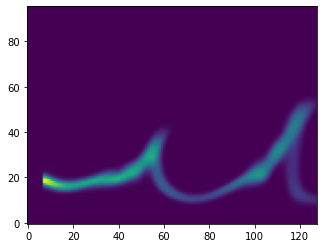

In [17]:
plt.imshow(ds_co2_xz['co2'][-6,:,0,:], origin='lower')

In [18]:
for t in range(len(ds_co2_xz['time'])):
    print(f"\rFrame {t+1}/{len(ds_co2_xz['time'])}", end='')
    plt.figure(figsize=(10,10))
    plt.imshow(ds_co2_xz['co2'][t,:,0,:], origin='lower', cmap='jet')
    plt.savefig('frames/co2_xz_{:04d}.png'.format(t))
    plt.close()

print()
print("Done with xz frames")

for t in range(len(ds_co2_xy['time'])):
    print(f"\rFrame {t+1}/{len(ds_co2_xy['time'])}", end='')
    plt.figure(figsize=(10,10))
    plt.imshow(ds_co2_xy['co2'][t,0,:,:], origin='lower')
    plt.savefig('frames/co2_xy_{:04d}.png'.format(t))
    plt.close()

print()
print("Done with xy frames")

Frame 121/121
Done with xz frames
Frame 121/121
Done with xy frames


In [19]:

# check if files co2_xz.mp4 and co2_xy.mp4 exist
# if they do, ask user if they want to overwrite
# if they don't, just make them

if os.path.isfile('co2_xz.mp4'):
    overwrite = input("Overwrite co2_xz.mp4? (y/n) ")
    if overwrite == 'y':
        !rm co2_xz.mp4
        !ffmpeg -framerate 10 -i frames/co2_xz_%04d.png -c:v libx264 -r 30 -pix_fmt yuv420p co2_xz.mp4
    else:
        print("Skipping co2_xz.mp4")
else:
    !ffmpeg -framerate 10 -i frames/co2_xz_%04d.png -c:v libx264 -r 30 -pix_fmt yuv420p co2_xz.mp4

if os.path.isfile('co2_xy.mp4'):
    overwrite = input("Overwrite co2_xy.mp4? (y/n) ")
    if overwrite == 'y':
        !rm co2_xy.mp4
        !ffmpeg -framerate 10 -i frames/co2_xy_%04d.png -c:v libx264 -r 30 -pix_fmt yuv420p co2_xy.mp4
    else:
        print("Skipping co2_xy.mp4")
else:
    !ffmpeg -framerate 10 -i frames/co2_xy_%04d.png -c:v libx264 -r 30 -pix_fmt yuv420p co2_xy.mp4

ffmpeg version 6.1.1 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 15.0.0 (clang-1500.1.0.2.5)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.1.1_2 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libso